# Rideshare Practice Analysis
## Setup

In [1]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Source Data (Remember to change these)
city_data_path = "data/city_data.csv"
ride_data_path = "data/ride_data.csv"

In [3]:
# Read the City and Ride Data
raw_city = pd.read_csv(city_data_path)
raw_ride = pd.read_csv(ride_data_path)

# Combine the data into a single dataset
raw_merge = pd.merge(raw_ride, raw_city, on="city")

# Display the data table for preview
raw_merge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [4]:
# Group data by city
city_grp = raw_merge.groupby("city")
city_summ = raw_city[["city", "driver_count", "type"]]

# Find average fare per ride per city
grp_info = pd.DataFrame(city_grp["fare"].mean())
grp_info = grp_info.rename(columns={"fare":"raw_avg_fare"})

# Find total number of rides per city
grp_info["ride_count"] = city_grp["ride_id"].count()

city_summ = pd.merge(grp_info, city_summ, on="city")
city_summ

,city,raw_avg_fare,ride_count,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural
5,Brandonfort,35.437368,19,10,Suburban
6,Carriemouth,28.314444,27,52,Urban
7,Christopherfurt,24.501852,27,41,Urban
8,Colemanland,30.894545,22,23,Suburban
9,Davidfurt,31.995882,17,23,Suburban


## Bubble Plot of Ride Sharing Data

In [5]:
#  Uncomment next line to plot the largest bubbles at the bottom
#city_summ = city_summ.sort_values("driver_count", ascending=False)

# Separate the data based on the three city types
urban_summ = city_summ.loc[city_summ["type"] == "Urban"]
subur_summ = city_summ.loc[city_summ["type"] == "Suburban"]
rural_summ = city_summ.loc[city_summ["type"] == "Rural"]

# Extract coordinates for plotting
ux = urban_summ["ride_count"].tolist()
uy = urban_summ["raw_avg_fare"].tolist()
ub = [10*i for i in urban_summ["driver_count"].tolist()]

sx = subur_summ["ride_count"].tolist()
sy = subur_summ["raw_avg_fare"].tolist()
sb = [10*i for i in subur_summ["driver_count"].tolist()]

rx = rural_summ["ride_count"].tolist()
ry = rural_summ["raw_avg_fare"].tolist()
rb = [10*i for i in rural_summ["driver_count"].tolist()]

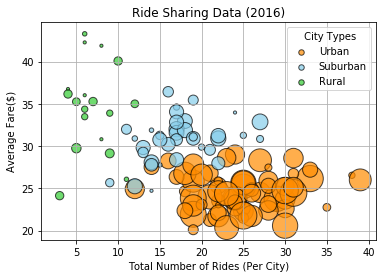

In [6]:
# Build the scatter plots for each city types
urban_plt = plt.scatter(ux, uy, s=ub, label='Urban', c='darkorange',  
                        alpha=0.7, edgecolor='black')
subur_plt = plt.scatter(sx, sy, s=sb, label="Suburban", c='skyblue',
                        alpha=0.7, edgecolor='black')
rural_plt = plt.scatter(rx, ry, s=rb, label="Rural", c='limegreen',
                        alpha=0.7, edgecolor='black')

# Incorporate the other graph properties
plt.title("Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.grid()

# Create a legend
lgnd = plt.legend(loc="upper right", title=" City Types", markerscale=0.5)
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]

# Incorporate a text label regarding circle size

# Save Figure

In [6]:
# Show plot

## Total Fares by City Type

In [7]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [8]:
# Show Figure

## Total Rides by City Type

In [9]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [10]:
# Show Figure

## Total Drivers by City Type

In [11]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [12]:
# Show Figure